Exploring and Analyzing the IMDB Top 250 Movies
- https://www.kaggle.com/code/kedarab/exploring-and-analyzing-the-imdb-top-250-movies/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [2]:
movies_data_path = 'IMDB Top 250 Movies.csv'
movies_data = pd.read_csv(movies_data_path)

In [3]:
movies_data.columns

Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
      dtype='object')

In [4]:
movies_data.sample(3)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
104,105,Full Metal Jacket,1987,8.3,"Drama,War",R,1h 56m,An Epic Story of the Vietnam War [Australia Th...,30000000,46358827,"Matthew Modine,R. Lee Ermey,Vincent D'Onofrio,...",Stanley Kubrick,"Stanley Kubrick,Michael Herr,Gustav Hasford"
179,180,Klaus,2019,8.2,"Animation,Adventure,Comedy",PG,1h 36m,Discover the friendship that launched a legend.,Not Available,Not Available,"Jason Schwartzman,J.K. Simmons,Rashida Jones,W...","Sergio Pablos,Carlos Martínez López(co-director)","Sergio Pablos,Jim Mahoney,Zach Lewis"
113,114,A Separation,2011,8.3,Drama,PG-13,2h 3m,"Ugly truth, sweet lies",500000,22926076,"Payman Maadi,Leila Hatami,Sareh Bayat,Shahab H...",Asghar Farhadi,Asghar Farhadi


In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [6]:
movies_data.isnull().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

In [7]:
movies_data.shape

(250, 13)

In [14]:
num_missing_cols = (movies_data == 'Not Available').any().sum()
print(f"{num_missing_cols} columns in dataset contain 'Not Available'.")

4 columns in dataset contain 'Not Available'.


In [16]:
not_avail_cols = []
for col in movies_data.columns:
    if 'Not Available' in movies_data[col].value_counts().index:
        not_avail_count = movies_data[col].value_counts()['Not Available']
        print(f"Column '{col}' has {not_avail_count} 'Not Available' values.")
        not_avail_cols.append(col)
print(f"\nThere are {len(not_avail_cols)} columns with 'Not Available' values: {not_avail_cols}")

Column 'certificate' has 1 'Not Available' values.
Column 'run_time' has 1 'Not Available' values.
Column 'budget' has 39 'Not Available' values.
Column 'box_office' has 30 'Not Available' values.

There are 4 columns with 'Not Available' values: ['certificate', 'run_time', 'budget', 'box_office']


## EDA (Exploratory Data Analysis)

#### Determine the distribution of movie rating

In [20]:
rating_counts = movies_data.rating.value_counts().sort_index()
rating_distribution = pd.DataFrame({
    'Rating' : rating_counts.index,
    'Count' : rating_counts 
})

display(rating_distribution)

,Rating,Count
8.0,8.0,5
8.1,8.1,68
8.2,8.2,55
8.3,8.3,38
8.4,8.4,30
8.5,8.5,22
8.6,8.6,13
8.7,8.7,4
8.8,8.8,7
8.9,8.9,1


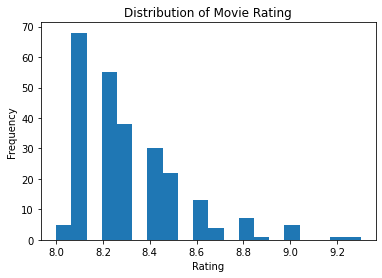

In [23]:
plt.hist(movies_data.rating, bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Rating')
plt.show()

#### Which movie genres are the most common in the dataset?

In [24]:
genre_counts = movies_data.genre.value_counts()

display(genre_counts.head(10))

Drama                         19
Crime,Drama                   14
Animation,Adventure,Comedy    10
Biography,Drama,History        9
Crime,Drama,Mystery            9
Drama,War                      8
Drama,Romance                  6
Crime,Drama,Thriller           5
Action,Crime,Drama             5
Action,Adventure,Drama         5
Name: genre, dtype: int64

#### What is the average budget for a movie in the dataset?

In [26]:
movies_data.budget = pd.to_numeric(movies_data.budget, errors='coerce')

average_budget = movies_data.budget.mean(skipna=True)

print(f'The average budget for a movie in the dataset is: {average_budget:.2f}')

The average budget for a movie in the dataset is: 52912272.62


#### What is the average box office revenue for a movie in the dataset?

In [27]:
# Replace "Not Available" value with NaN
movies_data.box_office = pd.to_numeric(movies_data.box_office, errors='coerce')

# Convert the Box-Office column to float datatype
movies_data.box_office = movies_data.box_office.astype(float)

# Calculate the average box office revenue for movies in the dataset
avg_box_office = movies_data.box_office.mean()

print(f'The average box office revenue for a movie in the dataset is {avg_box_office:.2f}')

The average box office revenue for a movie in the dataset is 238207554.30


#### How many movies were released each year in the dataset?

In [31]:
# Count the number of movies released in each year
year_counts = movies_data.year.value_counts()

print('The number of movies released in each year:\n', year_counts)

The number of movies released in each year:
 1995    8
2004    7
2009    6
1957    6
2003    6
       ..
1941    1
1958    1
2022    1
1987    1
1934    1
Name: year, Length: 86, dtype: int64


#### What is the average runtime of a movie in the dataset?

In [35]:
movies_data.run_time

0      2h 22m
1      2h 55m
2      2h 32m
3      3h 22m
4      1h 36m
        ...  
245    2h 26m
246    2h 22m
247    1h 30m
248    3h 11m
249     3h 1m
Name: run_time, Length: 250, dtype: object

In [37]:
# Define a function to convert runtime string to minutes
def runtime_to_minutes(runtime_str):
    if runtime_str == 'Not Available':
        return np.nan
    elif 'h ' in runtime_str:
        hours, minutes = runtime_str.split('h ')
        return int(hours) * 60 + int(minutes[:-1])
    else:
        return int(runtime_str[:-1])
    
# Apply the function to the run_time column
movies_data.runtime_minutes = movies_data.run_time.apply(runtime_to_minutes)

# Cacultate the average runtime in minutes
avg_runtime = movies_data.runtime_minutes.mean()

# Convert the average runtime back to hours and minutes format
hours = int(avg_runtime / 60)
minutes = int(avg_runtime % 60)
print(f'The average runtime of a movie in the dataset is {hours}h {minutes}m.')

The average runtime of a movie in the dataset is 2h 6m.


#### Which directors have the most movies in the dataset?

In [38]:
director_count = movies_data.directors.value_counts()
display(director_count)

Martin Scorsese       7
Christopher Nolan     7
Steven Spielberg      7
Stanley Kubrick       7
Akira Kurosawa        7
                     ..
Jean-Pierre Jeunet    1
Orson Welles          1
Thomas Vinterberg     1
Elem Klimov           1
Kevin Costner         1
Name: directors, Length: 160, dtype: int64

#### What is the most common certification rating for movies in the dataset?

In [40]:
most_common_certification = movies_data.certificate.value_counts().index[0]
display(most_common_certification)

'R'

#### Which actors appear in the most movies in the dataset?

In [44]:
actor_list = movies_data.casts.str.split(', ').explode()

# Count the number of times each actor appears in the dataset
actor_count = actor_list.value_counts()

# Top 10 actors whe appears in the most movies
top_actors = actor_count.head(10)

print('Top actors who appear in the most movies:')
for actor, count in top_actors.items():
    print(f'{actor}: {count}')

Top actors who appear in the most movies:
Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown,Gil Bellows,Mark Rolston,James Whitmore,Jeffrey DeMunn,Larry Brandenburg,Neil Giuntoli,Brian Libby,David Proval,Joseph Ragno,Jude Ciccolella,Paul McCrane,Renee Blaine,Scott Mann: 1
Hitoshi Takagi,Noriko Hidaka,Chika Sakamoto,Shigesato Itoi,Sumi Shimamoto,Tanie Kitabayashi,Hiroko Maruyama,Machiko Washio,Reiko Suzuki,Masashi Hirose,Toshiyuki Amagasa,Shigeru Chiba,Naoki Tatsuta,Tarako,Tomohiro Nishimura,Mitsuko Ishida,Chie Kôjiro,Daiki Nakamura: 1
Clark Gable,Vivien Leigh,Thomas Mitchell,Barbara O'Neil,Evelyn Keyes,Ann Rutherford,George Reeves,Fred Crane,Hattie McDaniel,Oscar Polk,Butterfly McQueen,Victor Jory,Everett Brown,Howard Hickman,Alicia Rhett,Leslie Howard,Olivia de Havilland,Rand Brooks: 1
Jason Flemyng,Dexter Fletcher,Nick Moran,Jason Statham,Steven Mackintosh,Nicholas Rowe,Nick Marcq,Charles Forbes,Vinnie Jones,Lenny McLean,Peter McNicholl,P.H. Moriarty,Frank Harper,Stev

#### What is the most common tagline used in movie descriptions?

In [45]:
top_tagline = movies_data.tagline.value_counts().head(1)
print('The most common tagline used in movie description is:\n', top_tagline)

The most common tagline used in movie description is:
 Fear can hold you prisoner. Hope can set you free.    1
Name: tagline, dtype: int64


#### Which writers have the most movie credits in the dataset?

In [47]:
writer_list = movies_data.writers.str.split(', ').explode()

# Count the number of times each writer appears in the dataset
writer_count = writer_list.value_counts()

# Top 10 writers who have the most movie credits
top_writers = writer_count.head(10)

print('Top writers with the most movie credits:')
print(top_writers)

Top writers with the most movie credits:
Charles Chaplin                                 4
J.R.R. Tolkien,Fran Walsh,Philippa Boyens       3
Ingmar Bergman                                  3
Stephen King,Frank Darabont                     2
Christopher Markus,Stephen McFeely,Stan Lee     2
Quentin Tarantino                               2
Akira Kurosawa,Shinobu Hashimoto,Hideo Oguni    2
Guy Ritchie                                     2
Hayao Miyazaki                                  2
Nicholas Pileggi,Martin Scorsese                2
Name: writers, dtype: int64


#### Distribution of movies by rating

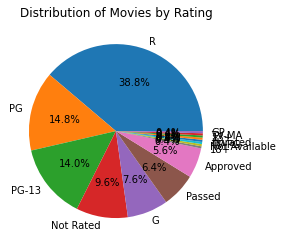

In [48]:
rating_counts = movies_data.certificate.value_counts()

plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Movies by Rating')
plt.show()

#### Movies Released by Decade

In [54]:
movies_data['decade'] = (movies_data['year'] // 10) * 10

movies_by_decade = movies_data.groupby('decade')['name'].count()

print(movies_by_decade)

decade
1920     6
1930     7
1940    12
1950    23
1960    18
1970    19
1980    27
1990    42
2000    48
2010    43
2020     5
Name: name, dtype: int64


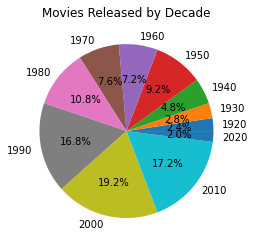

In [56]:
plt.pie(movies_by_decade, labels=movies_by_decade.index.astype(str), autopct='%1.1f%%')
plt.title('Movies Released by Decade')
plt.show()

#### How does the number of movies released each year vary over time?

In [59]:
movies_per_year = movies_data.groupby('year')['name'].count().reset_index(0)

print(movies_per_year)


    year  name
0   1921     1
1   1924     1
2   1925     1
3   1926     1
4   1927     1
..   ...   ...
81  2018     4
82  2019     6
83  2020     2
84  2021     2
85  2022     1

[86 rows x 2 columns]


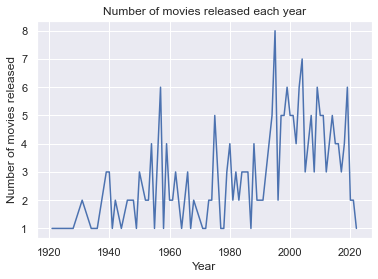

In [63]:
year_counts = movies_data.groupby('year').name.count()

# Create the line plot
sns.set(style='darkgrid')
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.title('Number of movies released each year')
plt.show()

#### What are the top 10 highest-grossing movies in the dataset?

In [64]:
top_10_grossing = movies_data.sort_values('box_office', ascending=False).head(10)
display(top_10_grossing)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,decade
77,78,Avengers: Endgame,2019,8.4,"Action,Adventure,Drama",PG-13,3h 1m,Avenge the fallen.,356000000.0,2.799439e+09,"Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee",2010
62,63,Avengers: Infinity War,2018,8.4,"Action,Adventure,Sci-Fi",PG-13,2h 29m,An entire universe. Once and for all.,321000000.0,2.052415e+09,"Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee",2010
149,150,Spider-Man: No Way Home,2021,8.2,"Action,Adventure,Fantasy",PG-13,2h 28m,The Multiverse Unleashed.,200000000.0,1.921847e+09,"Tom Holland,Zendaya,Benedict Cumberbatch,Jacob...",Jon Watts,"Chris McKenna,Erik Sommers,Stan Lee",2020
105,106,Top Gun: Maverick,2022,8.3,"Action,Drama",PG-13,2h 10m,Feel the need... The need for speed.,170000000.0,1.488733e+09,"Tom Cruise,Jennifer Connelly,Miles Teller,Val ...",Joseph Kosinski,"Jim Cash,Jack Epps Jr.,Peter Craig",2020
180,181,Harry Potter and the Deathly Hallows: Part 2,2011,8.1,"Adventure,Family,Fantasy",PG-13,2h 10m,It All Ends Here,125000000.0,1.342360e+09,"Daniel Radcliffe,Emma Watson,Rupert Grint,Mich...",David Yates,"Steve Kloves,J.K. Rowling",2010
6,7,The Lord of the Rings: The Return of the King,2003,9.0,"Action,Adventure,Drama",PG-13,3h 21m,The eye of the enemy is moving.,94000000.0,1.146458e+09,"Elijah Wood,Viggo Mortensen,Ian McKellen,Orlan...",Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens",2000
143,144,Jurassic Park,1993,8.2,"Action,Adventure,Sci-Fi",PG-13,2h 7m,Life finds a way.,63000000.0,1.109802e+09,"Sam Neill,Laura Dern,Jeff Goldblum,Richard Att...",Steven Spielberg,"Michael Crichton,David Koepp",1990
68,69,The Dark Knight Rises,2012,8.4,"Action,Drama",PG-13,2h 44m,The Legend Ends,250000000.0,1.081170e+09,"Christian Bale,Tom Hardy,Anne Hathaway,Gary Ol...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",2010
74,75,Joker,2019,8.4,"Crime,Drama,Thriller",R,2h 2m,Put on a happy face.,55000000.0,1.074458e+09,"Joaquin Phoenix,Robert De Niro,Zazie Beetz,Fra...",Todd Phillips,"Todd Phillips,Scott Silver,Bob Kane",2010
85,86,Toy Story 3,2010,8.3,"Animation,Adventure,Comedy",G,1h 43m,The Breakout Comedy Of The Summer,200000000.0,1.067316e+09,"Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,Don...",Lee Unkrich,"John Lasseter,Andrew Stanton,Lee Unkrich",2010


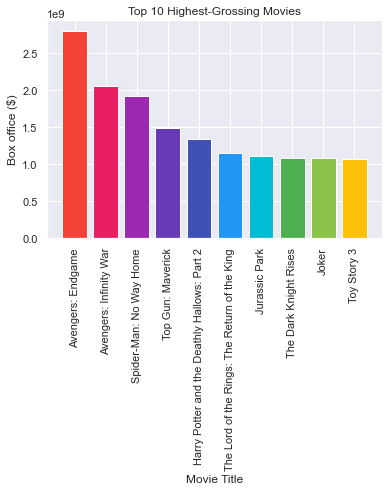

In [69]:
# Filter out the 'Not Available' box office values and sort by descending order
top_grossing = movies_data[movies_data['box_office'] != 'Not Available'].sort_values(by='box_office', ascending=False).head(10)

# Create a list of 10 different colors
colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#00BCD4', '#4CAF50', '#8BC34A', '#FFC107']

plt.bar(x=top_grossing.name, height=top_grossing.box_office, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Box office ($)')
plt.title('Top 10 Highest-Grossing Movies')
plt.show()

#### Is there a correlation between budget and box office revenue?

In [71]:
budget = movies_data.budget.replace('Not Available', pd.NA).astype(float)
box_office = movies_data.box_office.replace('Not Available', pd.NA).astype(float)

correlation = budget.corr(box_office)

print(f'The correlation coefficient between budget and box office revenue is {correlation:.2f}')

The correlation coefficient between budget and box office revenue is 0.25


#### How does the distribution of movie ratings differ by genre?

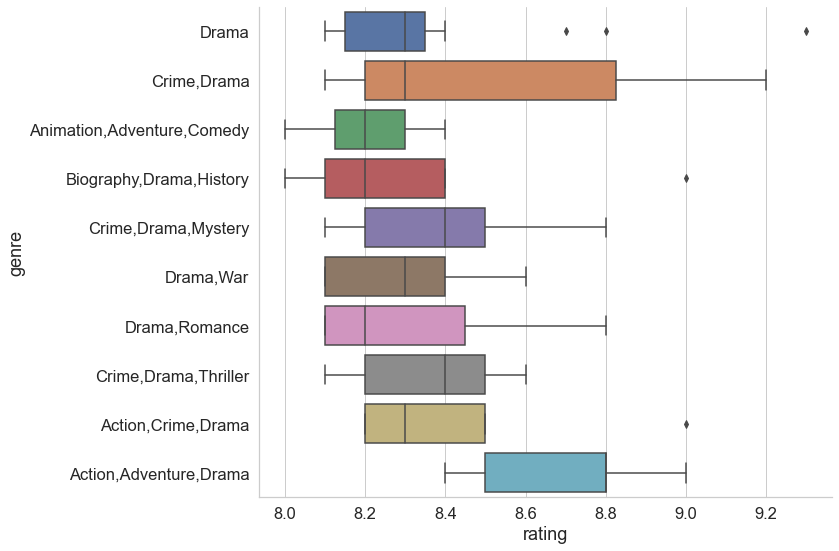

In [76]:
top_genres = movies_data.genre.str.split('|', expand=True).stack().value_counts().head(10).index

df_top_genres = movies_data[movies_data.genre.str.contains('|'.join(top_genres))]

sns.set(style='whitegrid', font_scale=1.5)
sns.catplot(x='rating', y='genre', data=df_top_genres, kind='box', height=8, aspect=1.5, order=top_genres)

In [77]:
movies_data.genre

0                           Drama
1                     Crime,Drama
2              Action,Crime,Drama
3                     Crime,Drama
4                     Crime,Drama
                  ...            
245                         Drama
246     Adventure,Biography,Drama
247    Animation,Adventure,Comedy
248       Biography,Drama,History
249       Adventure,Drama,Western
Name: genre, Length: 250, dtype: object